# Import all kind of stuff

In [336]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")

from utilities.corporate_design_colors_v4 import cmap, colors

from theory.models.bcs import Delta_meV_of_T
from theory.models.bcs import N_of_E
from theory.models.bcs import f_of_E
from theory.models.bcs import get_I_nA as get_I_nA_bcs

from theory.models.tg import get_I_pat_nA as get_I_nA_tg

from theory.models.constants import k_B_meV, G_0_muS, e, h

# Set plot fontsizes

In [337]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["font.size"] = 9
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

In [338]:
textwidth = 4.25279  # in
textheight = 6.85173

print(
    " 1.0",
    textwidth,
    textheight,
    "\n",
    "0.9",
    0.9 * textwidth,
    0.9 * textheight,
    "\n",
    "0.8",
    0.8 * textwidth,
    0.8 * textheight,
    "\n",
    "0.7",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.6",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.5",
    0.5 * textwidth,
    0.5 * textheight,
    "\n",
    "0.4",
    0.4 * textwidth,
    0.4 * textheight,
    "\n",
)

 1.0 4.25279 6.85173 
 0.9 3.8275110000000003 6.166557 
 0.8 3.402232 5.481384 
 0.7 2.976953 4.796211 
 0.6 2.976953 4.796211 
 0.5 2.126395 3.425865 
 0.4 1.701116 2.740692 



# Josephson $I(V)$

In [375]:
Delta_meV = 0.18
Gamma_meV = 0.0001
T_K = 0.0
V = np.linspace(-0.05, 2.8, 511)
V_mV = V * Delta_meV
tau = 0.001
I_C = np.pi / 2
I_J = np.sin(2 * np.pi / 18) * I_C

In [376]:
360 / 18

20.0

In [377]:
I_bcs = get_I_nA_bcs(
    V_mV=V_mV,
    Delta_meV=Delta_meV,
    tau=tau,
    T_K=T_K,
    Gamma_meV=Gamma_meV,
) / (Delta_meV * G_0_muS * tau)
V_min = V[np.argmin(np.abs(V))]
I = np.where(V == V_min, I_J, I_bcs)

In [380]:
np.min(I), np.max(I)

(np.float64(-1.556223469791636e-08), np.float64(2.477424001003417))

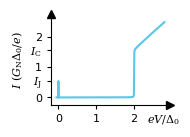

In [388]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.7, 1.2),
)
ax.plot(
    V,
    I,
    color=colors(0),
)

ax.set_ylim([-0.25, 2.75])

# Remove frame
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

ax_trans = ax.get_xaxis_transform()
# Draw arrow heads
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Simplify ticks
ax.set_xticks([0, 1, 2])
# ax.set_yticks([0, 1])
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

ax.set_yticks(
    [0, 1, 2, I_J, I_C], labels=["0", "1", "2", "$I_\\mathrm{J}$", "$I_\\mathrm{C}$"]
)
ax.text(x_lim[1] - 0.6, -0.75, "$eV/\\Delta_0$", ha="left", va="center", fontsize=8)
ax.set_ylabel("$I\\ (G_\\mathrm{N}\\Delta_0/e)$")


fig.tight_layout(pad=0.1)
fig.savefig("josephson-iv.pgf")
fig.savefig("josephson-iv.pdf")

# Josephson $I(\phi)$

In [366]:
phi = np.linspace(0, 2 * np.pi, 361)
I_J_phi = np.sin(phi)

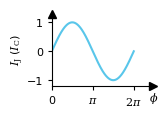

In [369]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.5, 1),
)
ax.plot(
    phi,
    I_J_phi,
    color=colors(0),
)

ax.set_ylim([-1.2, 1.3])
ax.set_xlim([0, 2 * np.pi + 1.5])
ax.set_yticks([-1, 0, 1])
ax.set_xticks([0, np.pi, 2 * np.pi], labels=["0", "$\\pi$", "$2\\pi$"])

# Remove frame
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

ax_trans = ax.get_xaxis_transform()
# Draw arrow heads
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Simplify ticks
# ax.set_yticks([0, 1])
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

ax.text(x_lim[1] - 0.35, -1.6, "$\\phi$", ha="left", va="center", fontsize=8)
ax.set_ylabel("$I_\\mathrm{J}$ ($I_\\mathrm{C}$)", labelpad=0)


fig.tight_layout(pad=0.1)
fig.savefig("josephson-iphi.pgf")
fig.savefig("josephson-iphi.pdf")

# $I_C(T)$ Ambegaokar-Baratoff

In [390]:
Delta_0_meV = 0.18
T_C_K = Delta_0_meV / (1.764 * k_B_meV)
T_K = np.linspace(0, T_C_K, 101)
Delta_T_meV = np.zeros_like(T_K)
for i, T in enumerate(T_K):
    Delta_T_meV[i] = Delta_meV_of_T(Delta_meV=Delta_0_meV, T_K=T)
I_C_nA = np.pi / 2 * Delta_0_meV
I_C_AB = Delta_T_meV * np.pi / (2) * np.tanh(Delta_T_meV / (2 * k_B_meV * T_K)) / I_C_nA
I_C_lin = (T_C_K - T_K) * 635e-3 / I_C_nA
I_C_lin[I_C_lin > 1.0] = np.nan

/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_3361/3616836601.py:8: RuntimeWarning: divide by zero encountered in divide
  I_C_AB = Delta_T_meV * np.pi / (2) * np.tanh(Delta_T_meV / (2 * k_B_meV * T_K)) / I_C_nA


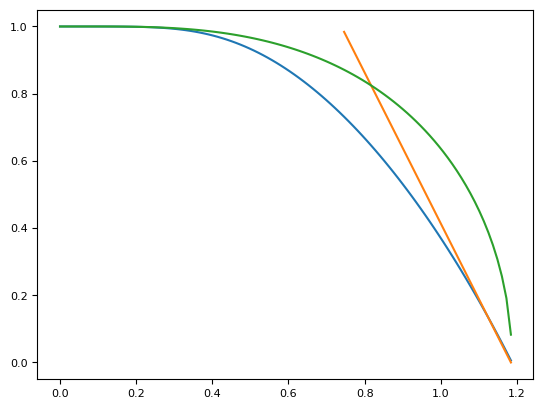

In [391]:
plt.plot(T_K, I_C_AB)
plt.plot(T_K, I_C_lin)
plt.plot(T_K, Delta_T_meV / Delta_0_meV)

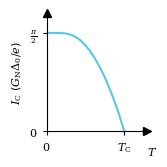

In [392]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.5, 1.5),
)
# Plot the simplified gap curve
ax.plot(T_K / T_C_K, I_C_AB, color=colors(0))
color = "k"  # colors(2)

ax.set_xlim(0, 1.3)
ax.set_ylim(0, 1.2)

# Remove frame
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

ax_trans = ax.get_xaxis_transform()
# Draw arrow heads
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Simplify ticks
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

# Move axis labels near arrow tips
ax.text(x_lim[1], -0.2, "$T$", ha="left", va="center", fontsize=8)
ax.set_ylabel("$I_\\mathrm{C}$ ($G_\\mathrm{N}\\Delta_0/e$)")
# ax.set_xlabel("$T/T_\\mathrm{C}$")
ax.set_yticks([0, 1], labels=["$0$", "$\\frac{\\pi}{2}$"])
ax.set_xticks([0, 1], labels=["$0$", "$T_\\mathrm{C}$"])


fig.tight_layout(pad=0.1)
fig.savefig("I_C-suppression.pgf")
fig.savefig("I_C-suppression.pdf")